In [2]:
import pandas as pd
import numpy as np 

In [3]:
df=pd.DataFrame(pd.read_csv('supermarket.csv'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32710 entries, 0 to 32709
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer Id  32710 non-null  object
 1   Date         32710 non-null  object
 2   Product      32710 non-null  object
dtypes: object(3)
memory usage: 766.8+ KB


In [5]:
df.head()

,Customer Id,Date,Product
0,JKML5ZWXP0XQ,2020-07-20,tropical fruit
1,YOGWQIUPDAJ7,2020-04-30,whole milk
2,Q3NL22281AF6,2020-09-18,pip fruit
3,C59GRTLMZQAU,2020-12-11,other vegetables
4,WUSF8LTEQZ5L,2020-01-02,whole milk


In [6]:
df.Product.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'chicken',
       'butter', 'fruit/vegetable juice', 'packaged fruit/vegetables',
       'chocolate', 'specialty bar', 'butter milk', 'bottled water',
       'yogurt', 'sausage', 'brown bread', 'hamburger meat',
       'root vegetables', 'pastry', 'berries', 'coffee', 'turkey',
       'curd cheese', 'frozen potato products', 'flour', 'sugar',
       'frozen meals', 'herbs', 'soda', 'detergent', 'grapes',
       'processed cheese', 'fish', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'specialty chocolate', 'condensed milk', 'cleaner', 'meat',
       'ice cream', 'hard cheese', 'pickled vegetables', 'UHT-milk',
       'candy', 'onions', 'domestic eggs', 'margarine', 'salt', 'oil',
       'whipped/sour cream', 'frozen vegetables', 'sliced cheese',
       'dish cleaner', 'baking powder', 'specialty chees

In [47]:
Number_of_product=df.Product.unique()

In [ ]:
#Question_1: Number of Products 

In [48]:
len(Number_of_product)

137

In [19]:
#Question_2: Mean of Product in each day
date_group=df.groupby('Date').agg(count=('Product', 'count')).mean()
date_group

count    44.931319
dtype: float64

In [28]:
#Question_3: 

product_group=df.groupby('Product').agg(count=('Product', 'count')).sort_values('count',ascending=True)
product_group.nsmallest(4, 'count')

,count
Product,
kitchen utensil,1
preservation products,1
baby cosmetics,3
bags,4


In [46]:
customer_high_basket=df.groupby(['Date', 'Customer Id']).agg(count=('Customer Id', 'size'))
customer_high_basket.groupby('Customer Id').sum().nlargest(5, 'count')



,count
Customer Id,
0P1TPIH74E79,32
0ZRF32AJ06BC,30
L1V5UZI2G191,28
7V1DR149IGK5,26
JKC89PT6OZ01,26


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32710 entries, 0 to 32709
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer Id  32710 non-null  object
 1   Date         32710 non-null  object
 2   Product      32710 non-null  object
dtypes: object(3)
memory usage: 766.8+ KB


In [50]:
df['Date']=pd.to_datetime(df['Date'])

In [55]:
df['DayofWeek']=df['Date'].dt.day_name()

<AxesSubplot:ylabel='DayofWeek'>

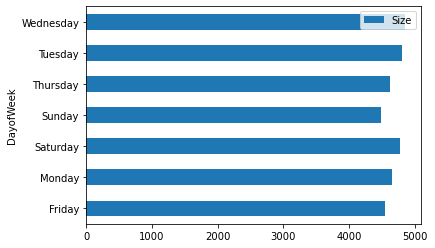

In [68]:
Day_of_week=df.groupby('DayofWeek').agg(Size=('Product', 'size'))
Day_of_week.sort_values('Size',ascending=True)
Day_of_week.plot(kind='barh')